Investigating early termination: tuning conditions
====

In [26]:
import gym
from gym import spaces
from gym.utils import seeding
import pybullet as p
import numpy as np
import time

import sys
sys.path.append('/Users/bibby/Code/anybullet_rl')
from common.paths import MODELS_PATH

physics_client = p.connect(p.DIRECT)
p.resetSimulation()
p.setGravity(0, 0, -9.81)
p.setTimeStep(0.02)
p.loadURDF(MODELS_PATH + 'plane/plane.urdf')

quadruped_start_pos = [0, 0, 0.58]
quadruped_start_orientation = p.getQuaternionFromEuler([0, 0, 0])
quadruped_joint_angles = [0.03, 0.4, -0.8, -0.03, 0.4, -0.8, 0.03, -0.4, 0.8, -0.03, -0.4, 0.8]

quadruped_id = p.loadURDF(MODELS_PATH + 'anymal_boxy/anymal_boxy.urdf',
                                       quadruped_start_pos, quadruped_start_orientation,
                                       flags=p.URDF_USE_SELF_COLLISION)

p.setPhysicsEngineParameter(numSolverIterations=100)

In [21]:
quadruped_joint_angles = [0.03, 0.4, -0.8, -0.03, 0.4, -0.8, 0.03, -0.4, 0.8, -0.03, -0.4, 0.8]

quadruped_joint_ids = []
active_joint = 0
for j in range(p.getNumJoints(quadruped_id)):
    p.changeDynamics(quadruped_id, j, linearDamping=0, angularDamping=0)
    info = p.getJointInfo(quadruped_id, jointIndex=j)
    joint_type = info[2]
    if joint_type == p.JOINT_PRISMATIC or joint_type == p.JOINT_REVOLUTE:
        quadruped_joint_ids.append(j)
        p.resetJointState(quadruped_id, j, quadruped_joint_angles[active_joint])
        active_joint+=1


In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


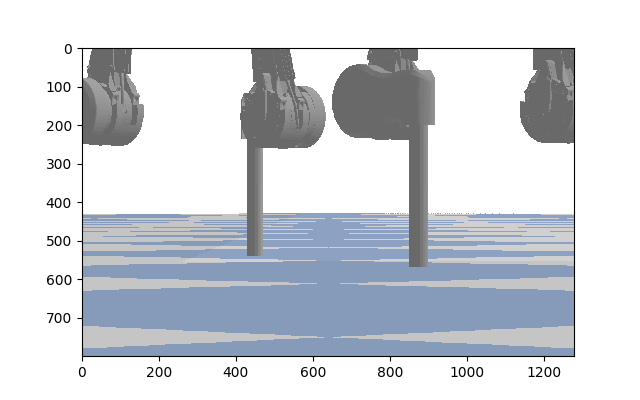

In [30]:
def draw_anymal():
    camTargetPos = [0, 0, 0.1]
    cameraUp = [0, 0, 1]
    cameraPos = [1, 1, 1]
    pitch = -20.0
    pitch = 0.0
    roll = 0
    yaw = 45
    upAxisIndex = 2
    camDistance = 5
    make_bigger = 2
    pixelWidth = int(640*make_bigger)
    pixelHeight = int(400*make_bigger)
    nearPlane = 0.01
    farPlane = 100
    fov = 6

    fig, ax = plt.subplots(figsize=(6.4, 4))
    plt.cla()
    p.stepSimulation()
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex) 
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
    img_arr = p.getCameraImage(pixelWidth,
                              pixelHeight,
                              viewMatrix,
                              projectionMatrix,
                              shadow=1,
                              lightDirection=[1, 1, 1],
                              renderer=p.ER_BULLET_HARDWARE_OPENGL)
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    np_img_arr = np.reshape(rgb, (h, w, 4))
    np_img_arr = np_img_arr * (1. / 255.)
    image = ax.imshow(np_img_arr)
    # plt.show()

quadruped_start_pos = [0, 0, 0.5]
quadruped_orientation = p.getQuaternionFromEuler([0, 0, 0])
p.resetBasePositionAndOrientation(quadruped_id, quadruped_start_pos, quadruped_orientation)
draw_anymal()
